In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt


In [2]:
data_set = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
data_set.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data_set.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data_set.shape

(200, 5)

In [8]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data_set.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
data_set.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


USING K-MEANS CLUSTERING

In [11]:
from sklearn.cluster import KMeans

In [72]:
input1 = data_set[['Age','Spending Score (1-100)']]

In [73]:
input1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


Now performing for age vs spending score

finding wcss to find optimal no. of clusters

In [74]:
wcss = []
for i in range(1,11):
  k_means = KMeans(n_clusters = i)
  k_means.fit(input1)
  wcss.append(k_means.inertia_)

In [75]:
wcss

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23928.84878291938,
 19694.27896252853,
 15921.427904120152,
 13091.763404723928,
 11475.361628787881,
 10689.618786634082]

Text(0, 0.5, 'wcss')

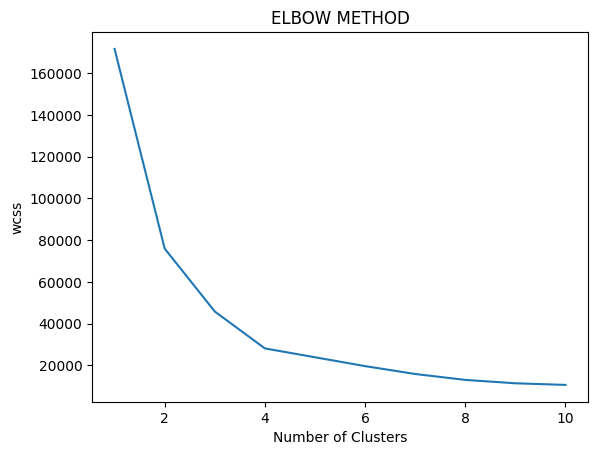

In [76]:
plt.plot(range(1,11),wcss)
plt.title("ELBOW METHOD")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")

In [77]:
k_m = KMeans(n_clusters = 4)
pred = k_m.fit_predict(input1)

In [78]:
pred

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 0,
       1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

Text(0, 0.5, 'Spending Score')

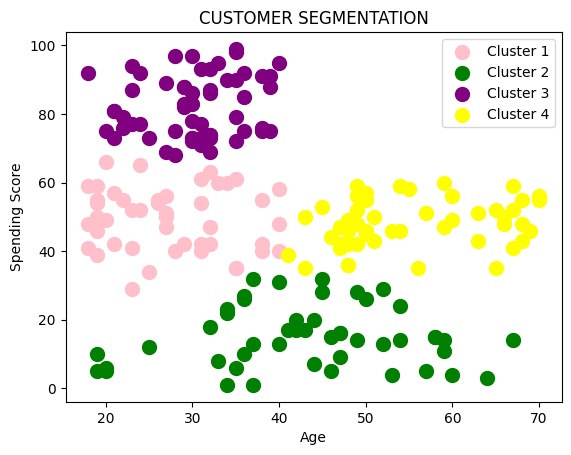

In [80]:
plt.scatter(input1.iloc[pred==0,0], input1.iloc[pred==0,1], s=100, c= 'pink', label = "Cluster 1")
plt.scatter(input1.iloc[pred==1,0], input1.iloc[pred==1,1], s=100, c= 'green', label = "Cluster 2")
plt.scatter(input1.iloc[pred==2,0], input1.iloc[pred==2,1], s=100, c= 'purple', label = "Cluster 3")
plt.scatter(input1.iloc[pred==3,0], input1.iloc[pred==3,1], s=100, c= 'yellow', label = "Cluster 4")

plt.legend()
plt.title("CUSTOMER SEGMENTATION")
plt.xlabel("Age")
plt.ylabel("Spending Score")

TAKING FEATURES ANNUAL INCOME AND SPENDING SCORE

In [53]:
input = data_set[['Annual Income (k$)','Spending Score (1-100)']]

In [56]:
k_means = KMeans()
k_means.fit(input)

KMeans()

In [57]:
k_means = KMeans()
k_means.fit_predict(input)

array([1, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 1, 3,
       4, 3, 4, 3, 1, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1, 5, 1, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 2, 0, 5, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 6, 7, 6, 7, 6, 7,
       6, 7], dtype=int32)

ELBOW METHOD TO FIND THE OPTIMAL NUMBER OF CLUSTERS

In [59]:
wcss = []
for i in range(1,11):
  k_means = KMeans(n_clusters = i)
  k_means.fit(input)
  wcss.append(k_means.inertia_)

In [60]:
wcss

[269981.28000000014,
 184609.98434090626,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 38797.9027638142,
 33610.52852664579,
 26161.190066316656,
 22900.226153870633,
 21899.28474584996]

Text(0, 0.5, 'wcss')

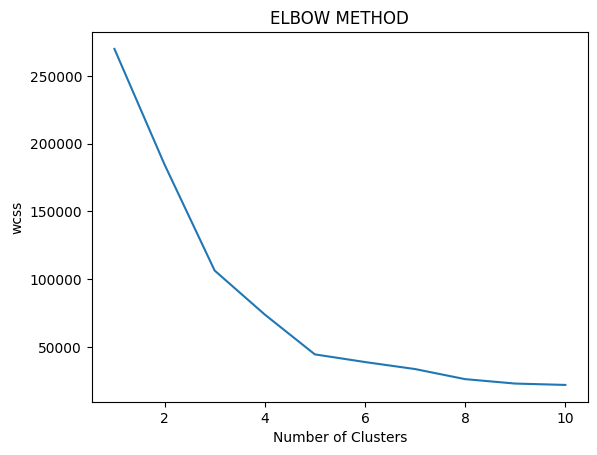

In [61]:
plt.plot(range(1,11),wcss)
plt.title("ELBOW METHOD")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")

MODEL TRAINING WITH OPTIMAL NO.OF CLUSTERS

In [86]:
input = data_set[['Annual Income (k$)','Spending Score (1-100)']]

In [87]:
input

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [88]:
k_means = KMeans(n_clusters = 5)
prediction = k_means.fit_predict(input)

In [89]:
prediction

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

Text(0, 0.5, 'Spending Score')

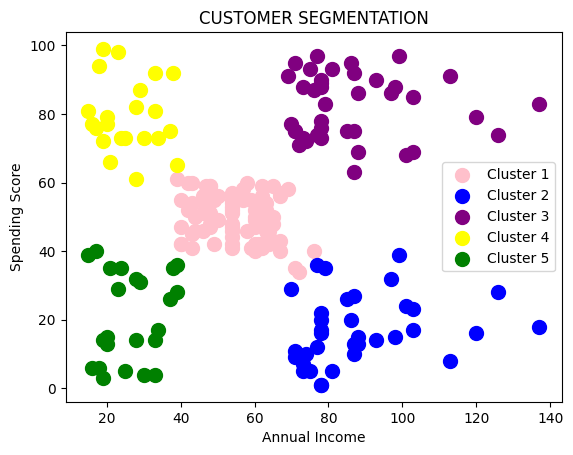

In [90]:
plt.scatter(input.iloc[prediction==0,0], input.iloc[prediction==0,1], s=100, c= 'pink', label = "Cluster 1")
plt.scatter(input.iloc[prediction==1,0], input.iloc[prediction==1,1], s=100, c= 'blue', label = "Cluster 2")
plt.scatter(input.iloc[prediction==2,0], input.iloc[prediction==2,1], s=100, c= 'purple', label = "Cluster 3")
plt.scatter(input.iloc[prediction==3,0], input.iloc[prediction==3,1], s=100, c= 'yellow', label = "Cluster 4")
plt.scatter(input.iloc[prediction==4,0], input.iloc[prediction==4,1], s=100, c= 'green', label = "Cluster 5")

plt.legend()
plt.title("CUSTOMER SEGMENTATION")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [91]:
k_means.predict([[15,39]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

saving model

In [92]:
import joblib

In [93]:
joblib.dump(k_means, "/content/Mall_Customers.csv" )

['/content/Mall_Customers.csv']

In [94]:
model = joblib.load("/content/Mall_Customers.csv")

In [95]:
model.predict([[15,39]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

SUCCESSFULLY COMPLETED ..............SEGMENTED MALL CUSTOMERS INTO 5 CLUSTER(GROUPS) NOW WE TARGET THE CUSTOMERS BASED ON CLUSTERS TO INCREASE THE PROFITS, MARKET